In [1]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)
# Parameters
Two,Ttrain = 2000,50000
N = 200
C = 0.98
dim = 5
N_d = int(N * dim)
maxtau = int(N_d / dim * 2)
maxtau = int(N_d *1.5)
maxtau = int(N_d *1.2)
taus = np.arange(1,maxtau)

torch.manual_seed(0)
u_sym = torch.normal(0,1,size = (dim, Two + Ttrain)).to("cuda:0")

#
randomizer = torch.arange(1,dim+1)
#randomizer = torch.rand(dim)*dim + 1
#randomizer = torch.sort(randomizer)[0]

for i in range(dim):
    u_sym[i] = u_sym[i]*torch.sqrt(randomizer[i])

    
    
esn = ESN.ESN_mult(N_d, uC=C, dim=dim,idWin=True)

st = time.time()
Xwo = esn.run_washout(u_sym, Two, actf="identity")
print("runtime :",time.time()-st)

st = time.time()
#mfs = ESN.MCwithPI_general(u_sym, Xwo, maxtau)
#mfs = ESN.MCwithPI_general_newsur(u_sym, Xwo, maxtau,sur_sets=1)
#mfs = ESN.MC_cSVD_old(u_sym, Xwo, maxtau)
#mfs,sur_val = ESN.MC_cSVD(u_sym, Xwo, maxtau,ret_sur=True)
raw_res,lin,rev,sur_val = ESN.MC_cSVD(u_sym, Xwo, maxtau,ret_all=True)
mfs = rev


print("calc time :",time.time()-st)


totMC = torch.sum(mfs).cpu().numpy()

#colors = ["r", "g", "b", "c", "m", "y","pink","lime"]
print(f"totMC:{totMC}\nsurrogate value: {sur_val.cpu().numpy()}")
#print(f"totMC:{totMC}")

runtime : 2.4238080978393555


TypeError: MC_cSVD() got an unexpected keyword argument 'raw_mfs'

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    plt.plot(taus,mfs[d].cpu().numpy(),alpha=0.6,label="dim "+str(d))
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)

0.15576563444972027
0.13886337802011442


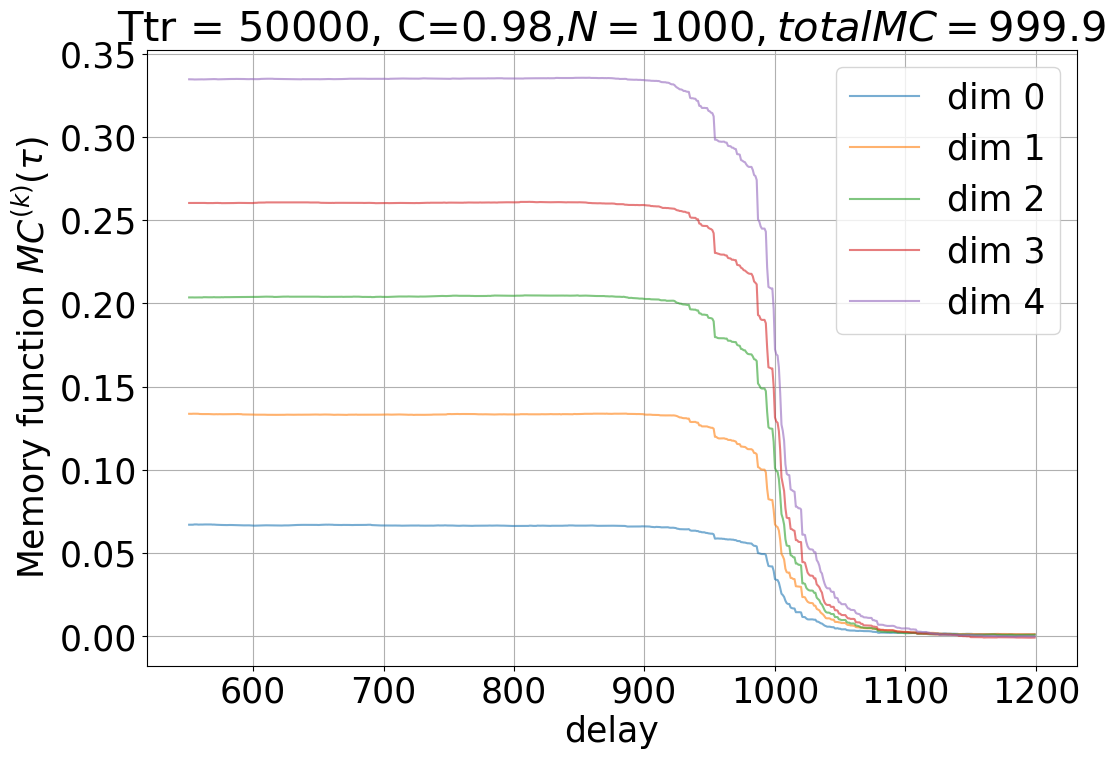

In [14]:
fig,ax = plt.subplots(figsize=(12,8))

tau_st =550 
for d in range(dim):
    plt.plot(taus[tau_st:],mfs[d][tau_st:].cpu().numpy(),alpha=0.6,label="dim "+str(d))

print(torch.mean(raw_res[:,tau_st:]).cpu().numpy())
print(torch.mean(mfs[:,tau_st:]).cpu().numpy())


plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)

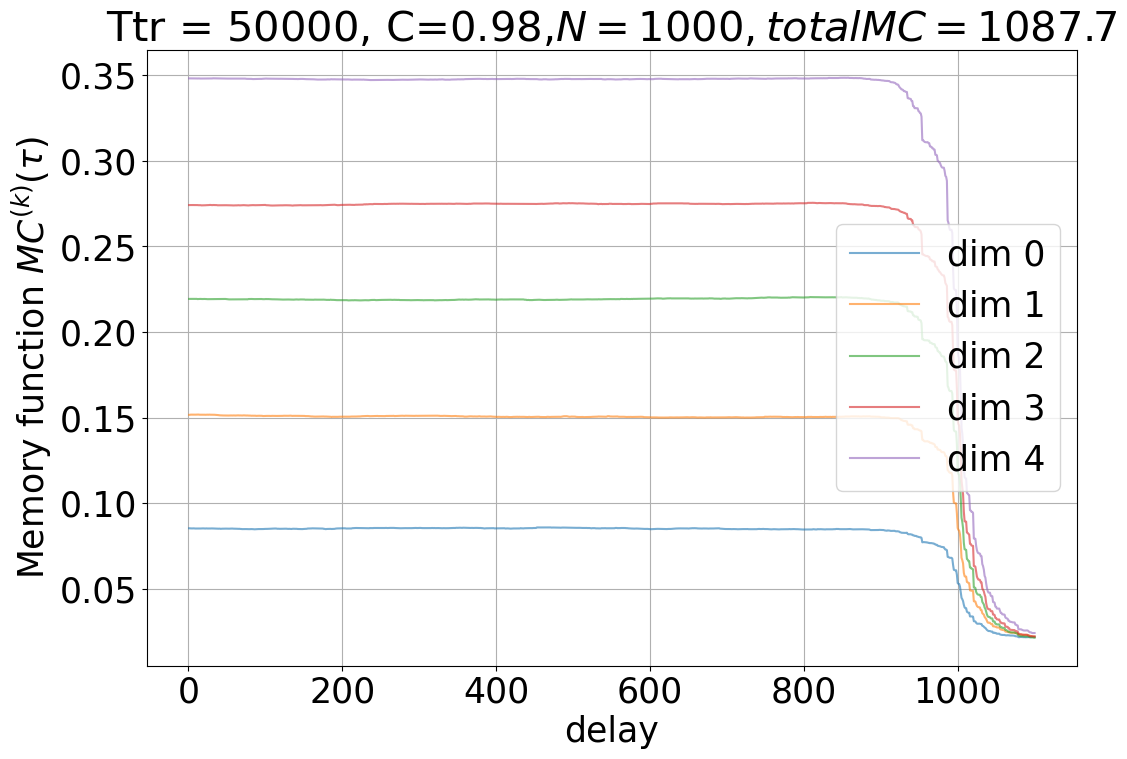

In [17]:
fig,ax = plt.subplots(figsize=(12,8))

tau_end = 1100
for d in range(dim):
    plt.plot(taus[:tau_end],raw_res[d][:tau_end].cpu().numpy(),alpha=0.6,label="dim "+str(d))
totrawMC = torch.sum(raw_res[:,:tau_end]).cpu().numpy()
#plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totrawMC))
#
plt.legend()
plt.grid(True)

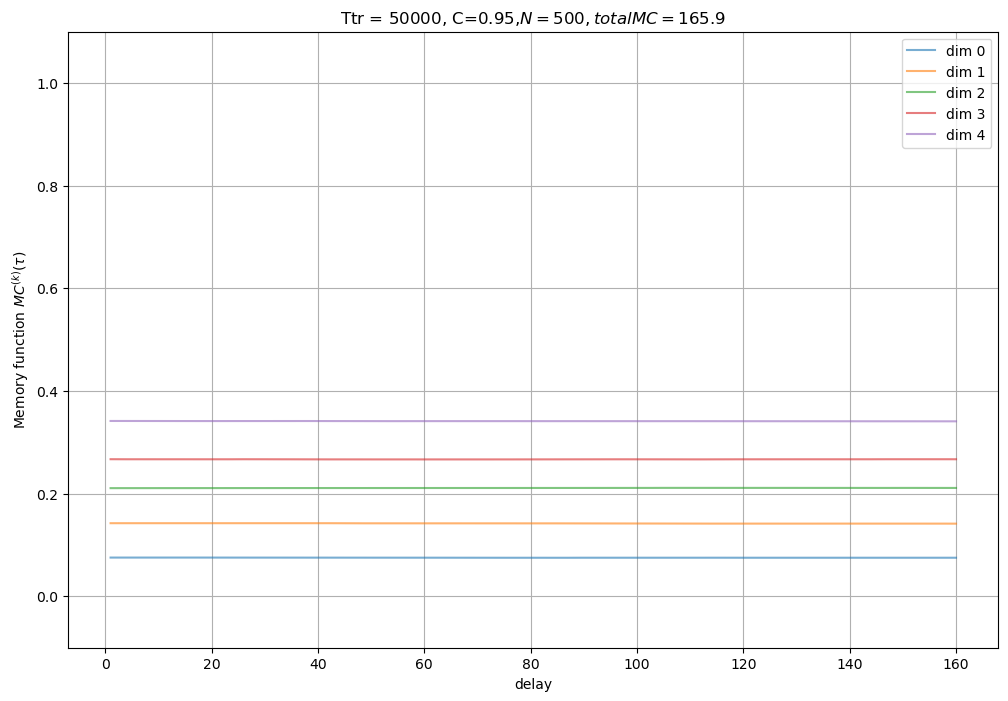

In [5]:
fig,ax = plt.subplots(figsize=(12,8))

tau_end = 160
for d in range(dim):
    plt.plot(taus[:tau_end],raw_res[d][:tau_end].cpu().numpy(),alpha=0.6,label="dim "+str(d))
totrawMC = torch.sum(raw_res[:,:tau_end]).cpu().numpy()
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totrawMC))
#
plt.legend()
plt.grid(True)

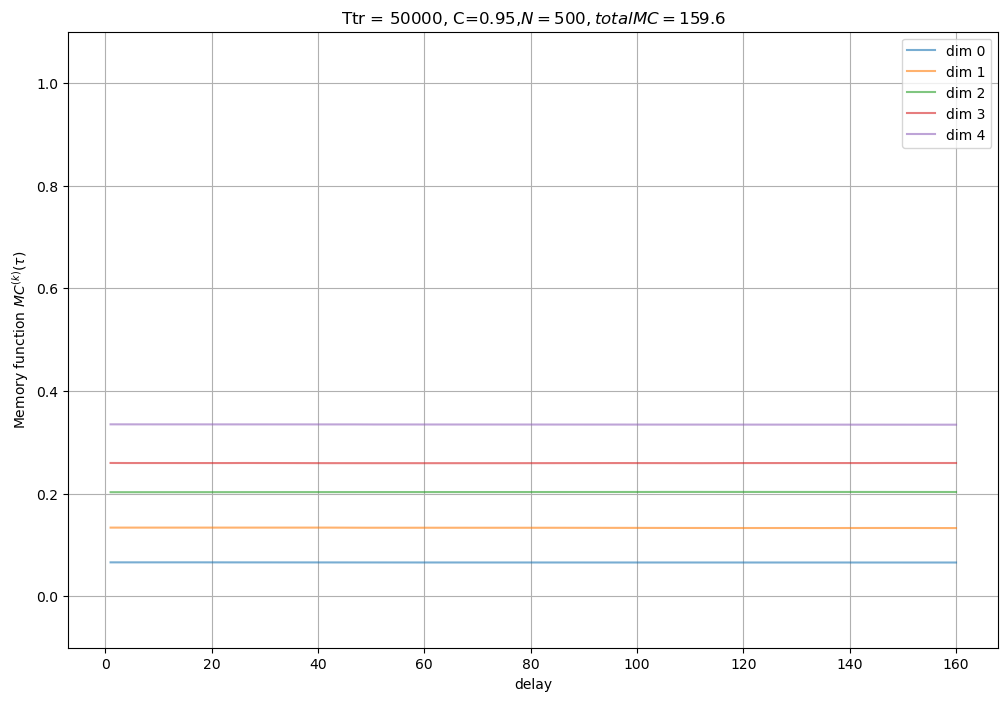

In [6]:
fig,ax = plt.subplots(figsize=(12,8))

tau_end = 160
for d in range(dim):
    plt.plot(taus[:tau_end],mfs[d][:tau_end].cpu().numpy(),alpha=0.6,label="dim "+str(d))
totMC = torch.sum(mfs[:,:tau_end]).cpu().numpy()
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)

calc time : 3.6958749294281006


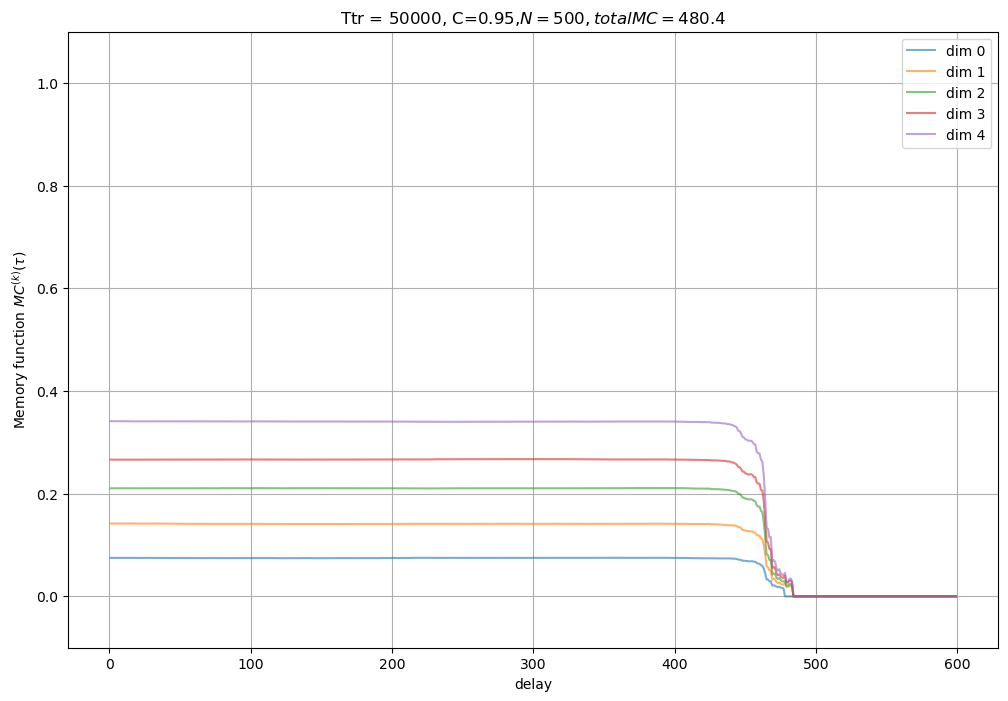

In [7]:
""""""
st = time.time()
#mfs = ESN.MCwithPI_general(u_sym, Xwo, maxtau)
mfs = ESN.MCwithPI_general_with_surrogate(u_sym, Xwo, maxtau,sur_samples=10)
#mfs = ESN.MCwithPI_general_newsur(u_sym, Xwo, maxtau,sur_sets=1)
#mfs = ESN.MC_cSVD_old(u_sym, Xwo, maxtau)
#mfs = ESN.MC_cSVD(u_sym, Xwo, maxtau)
print("calc time :",time.time()-st)

totMC = torch.sum(mfs)

taus = np.arange(1,maxtau)
fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    #plt.plot(taus,mfs[d].cpu().numpy(),color=colors[d],alpha=0.6,label="dim "+str(d))
    plt.plot(taus,mfs[d].cpu().numpy(),alpha=0.6,label="dim "+str(d))
    
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
plt.legend()
plt.grid(True)


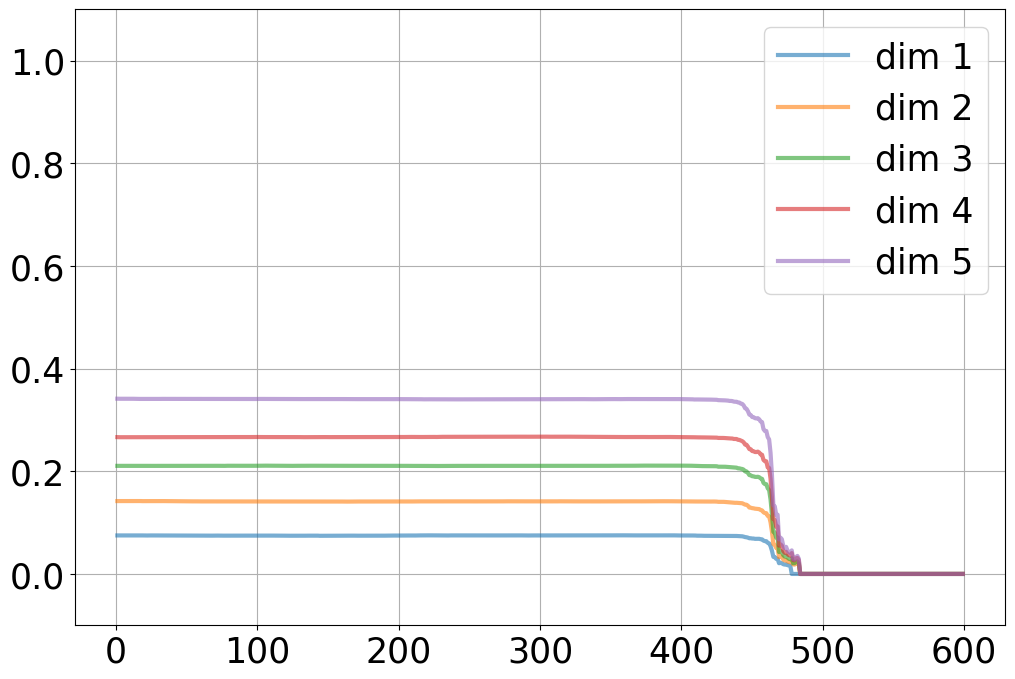

In [8]:
plt.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(figsize=(12,8))

for d in range(dim):
    #plt.plot(taus,mfs[d].cpu().numpy(),color=colors[d],alpha=0.6,label="dim "+str(d))
    plt.plot(taus,mfs[d].cpu().numpy(),alpha=0.6,label="dim "+str(d+1),linewidth=3)

plt.ylim(-0.1,1.1)
#plt.xlabel("delay")
#plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
#plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
plt.legend()
plt.grid(True)